In [17]:
import os
import glob
import pandas as pd
import numpy as np

### Data importeren

In [18]:
path = 'data/'
df = pd.read_csv(path + '1yeardata.csv')

### Kolom die toegevoegd is bij het mergen van de twee datasets verwijderen

In [19]:
df = df.drop(columns=['Unnamed: 0'])

### Data valideren

In [20]:
df.head()

,date,serial_number,model,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_194_raw,smart_197_raw,smart_198_raw
0,2020-01-01,Z305B2QN,ST4000DM000,0,0.0,35462.0,0.0,0.0,22.0,0.0,0.0
1,2020-01-01,ZJV0XJQ4,ST12000NM0007,0,0.0,12494.0,0.0,0.0,28.0,0.0,0.0
2,2020-01-01,ZJV0XJQ3,ST12000NM0007,0,0.0,9544.0,0.0,0.0,29.0,0.0,0.0
3,2020-01-01,ZJV0XJQ0,ST12000NM0007,0,0.0,13098.0,0.0,0.0,25.0,0.0,0.0
4,2020-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,0,0.0,25546.0,NaN,NaN,28.0,0.0,0.0


In [21]:
df.tail()

,date,serial_number,model,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_194_raw,smart_197_raw,smart_198_raw
31945055,2020-12-31,ZJV2ESXT,ST12000NM0007,0,0.0,16158.0,0.0,0.0,21.0,0.0,0.0
31945056,2020-12-31,ZA13ZBCT,ST8000DM002,0,0.0,35836.0,0.0,0.0,36.0,0.0,0.0
31945057,2020-12-31,PL1331LAHGD9NH,HGST HMS5C4040BLE640,0,0.0,33286.0,NaN,NaN,29.0,0.0,0.0
31945058,2020-12-31,PL2331LAHDS4TJ,HGST HMS5C4040BLE640,0,0.0,33298.0,NaN,NaN,29.0,0.0,0.0
31945059,2020-12-31,X0GEV9EC,WDC WUH721414ALE6L4,0,0.0,1543.0,NaN,NaN,40.0,0.0,0.0


In [22]:
df.shape

(31945060, 11)

Aantal dagen (moet 366 zijn want blijkbaar had 2020 366 dagen lol)

In [103]:
df['date'].drop_duplicates().count()

366

## NaN values

In [58]:
df.isnull().sum()

date                   0
serial_number          0
model                  0
failure                0
smart_5_raw        30233
smart_9_raw        30233
smart_187_raw    9942818
smart_188_raw    9942818
smart_194_raw      30233
smart_197_raw      54960
smart_198_raw      30233
dtype: int64

In [59]:
df.isnull().sum().sum()

20061528

### Procent van missing NaN waardes per feature weergeven

In [23]:
missing_nan = df.isnull().sum() * 100 / len(df)
missing_nan_df = pd.DataFrame({'% NAN missing': missing_nan})

In [24]:
missing_nan_df.head(15)

,% NAN missing
date,0.000000
serial_number,0.000000
model,0.000000
failure,0.000000
smart_5_raw,0.094641
smart_9_raw,0.094641
smart_187_raw,31.124744
smart_188_raw,31.124744
smart_194_raw,0.094641
smart_197_raw,0.172045


## Hoeveelheid NaN values gecategoriseerd per missing %

### 0.094641

<AxesSubplot:title={'center':'smart_5_raw'}>

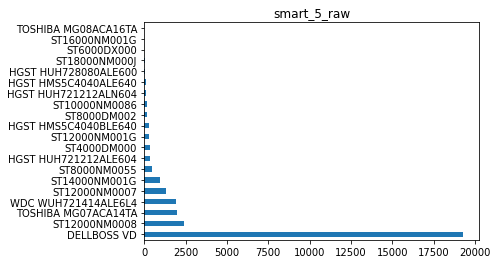

In [49]:
nan_5 = df[['model', 'smart_5_raw']][df.smart_5_raw.isnull()].model.value_counts()
nan_5.head(20).plot(kind = 'barh', title = "smart_5_raw")

<AxesSubplot:title={'center':'smart_9_raw'}>

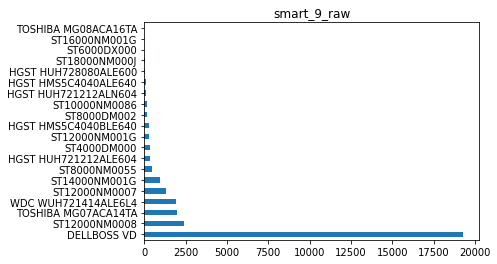

In [50]:
nan_9 = df[['model', 'smart_9_raw']][df.smart_9_raw.isnull()].model.value_counts()
nan_9.head(20).plot(kind = 'barh', title = "smart_9_raw")

<AxesSubplot:title={'center':'smart_194_raw'}>

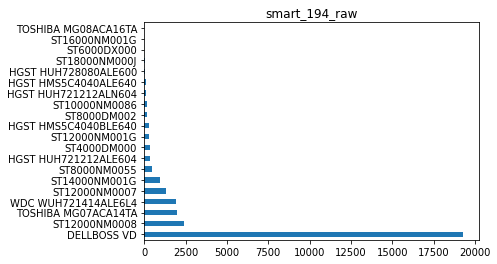

In [51]:
nan_194 = df[['model', 'smart_194_raw']][df.smart_194_raw.isnull()].model.value_counts()
nan_194.head(20).plot(kind = 'barh', title = "smart_194_raw")

<AxesSubplot:title={'center':'smart_198_raw'}>

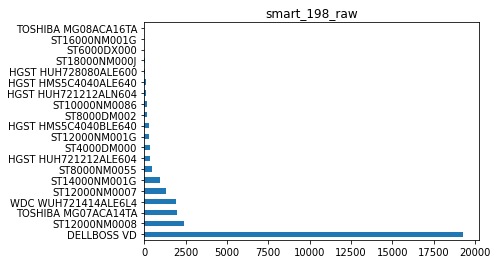

In [52]:
nan_198 = df[['model', 'smart_198_raw']][df.smart_198_raw.isnull()].model.value_counts()
nan_198.head(20).plot(kind = 'barh', title = "smart_198_raw")

### 31.124744

<AxesSubplot:title={'center':'smart_187_raw'}>

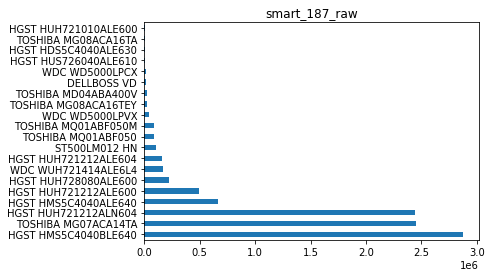

In [53]:
nan_187 = df[['model', 'smart_187_raw']][df.smart_187_raw.isnull()].model.value_counts()
nan_187.head(20).plot(kind = 'barh', title = "smart_187_raw")

<AxesSubplot:title={'center':'smart_188_raw'}>

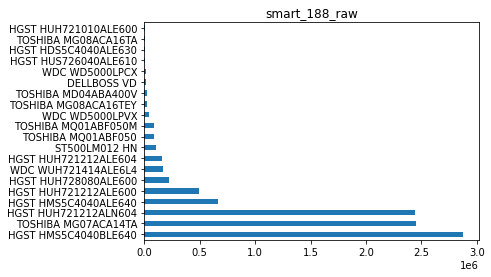

In [54]:
nan_188 = df[['model', 'smart_188_raw']][df.smart_188_raw.isnull()].model.value_counts()
nan_188.head(20).plot(kind = 'barh', title = "smart_188_raw")

### 0.172045

<AxesSubplot:title={'center':'smart_197_raw'}>

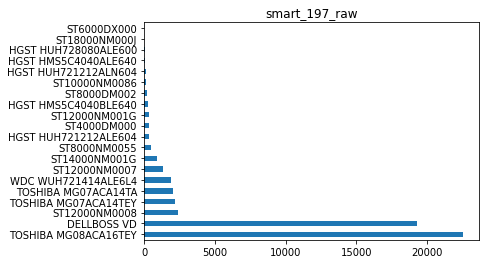

In [55]:
nan_197 = df[['model', 'smart_197_raw']][df.smart_197_raw.isnull()].model.value_counts()
nan_197.head(20).plot(kind = 'barh', title = "smart_197_raw")

## Totaal aantal NaN per model

In [66]:
df_nan_total = df.isnull().groupby(df.model).sum()

In [76]:
df_nan_total.shape

(51, 11)

In [106]:
df_nan_total.head(51)

,date,serial_number,model,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_194_raw,smart_197_raw,smart_198_raw
model,,,,,,,,,,,
DELLBOSS VD,0,0,0,0,19280,19280,19280,19280,19280,19280,19280
HGST HDS5C4040ALE630,0,0,0,0,0,0,5728,5728,0,0,0
HGST HMS5C4040ALE640,0,0,0,0,90,90,667839,667839,90,90,90
HGST HMS5C4040BLE640,0,0,0,0,271,271,2875707,2875707,271,271,271
HGST HMS5C4040BLE641,0,0,0,0,0,0,210,210,0,0,0
HGST HUH721010ALE600,0,0,0,0,1,1,4525,4525,1,1,1
HGST HUH721212ALE600,0,0,0,0,0,0,495274,495274,0,0,0
HGST HUH721212ALE604,0,0,0,0,370,370,161768,161768,370,370,370
HGST HUH721212ALN604,0,0,0,0,118,118,2441464,2441464,118,118,118


Code om te checken

In [92]:
df_onemodel = df.loc[df['model'] == 'TOSHIBA MG07ACA14TA']

In [98]:
df_onemodel['smart_187_raw'].isnull().sum()

2455137